In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from dnn_app_utils_v3 import *

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

my_ID = 400132290
np.random.seed(my_ID)
np.set_printoptions(precision=2)# reduced display precision on numpy arrays

In [2]:
data = pd.read_csv("data_banknote_authentication.txt")
X = data.iloc[:, :-1]
y = data.iloc[:,-1].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=my_ID)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=my_ID)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_valid = sc.transform(x_valid)
# x_train = x_train.T
# x_test = x_test.T
# x_valid = x_valid.T
print(f"X Shape: {x_train.shape}, X Type:{type(x_train)})")
print(f"y Shape: {y_valid.shape}, y Type:{type(y_valid)})")
# y_train = y_train.reshape(1,-1)
# y_valid = y_valid.reshape(1,-1)
# y_test = y_test.reshape(1,-1)
print(y_train.shape)


X Shape: (822, 4), X Type:<class 'numpy.ndarray'>)
y Shape: (274,), y Type:<class 'numpy.ndarray'>)
(822,)


In [3]:
model = Sequential(
    [               
        tf.keras.Input(shape=(4,)),    #specify input size
        ### START CODE HERE ### 
        Dense(25,activation='sigmoid', name='layer1'),
        Dense(15,activation='sigmoid', name='layer2'),
        Dense(1,activation='sigmoid', name='layer3')
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                125       
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [4]:
[layer1, layer2, layer3] = model.layers
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (4, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


print(model.layers[2].weights)

In [5]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    x_train,y_train,
    epochs=20
)

Epoch 1/20


26/26 [==============================] - 1s 1ms/step - loss: 0.7059
Epoch 2/20
26/26 [==============================] - 0s 1ms/step - loss: 0.6853
Epoch 3/20
26/26 [==============================] - 0s 1ms/step - loss: 0.6720
Epoch 4/20
26/26 [==============================] - 0s 1ms/step - loss: 0.6578
Epoch 5/20
26/26 [==============================] - 0s 1ms/step - loss: 0.6413
Epoch 6/20
26/26 [==============================] - 0s 1ms/step - loss: 0.6217
Epoch 7/20
26/26 [==============================] - 0s 1ms/step - loss: 0.5985
Epoch 8/20
26/26 [==============================] - 0s 1ms/step - loss: 0.5716
Epoch 9/20
26/26 [==============================] - 0s 1ms/step - loss: 0.5411
Epoch 10/20
26/26 [==============================] - 0s 1ms/step - loss: 0.5085
Epoch 11/20
26/26 [==============================] - 0s 1ms/step - loss: 0.4736
Epoch 12/20
26/26 [==============================] - 0s 1ms/step - loss: 0.4377
Epoch 13/20
26/26 [==============================] - 0s 1ms/

In [6]:
prediction = model.predict(x_valid[0].reshape(1,4))  # a zero
print(f" predicting: {prediction}")
print(f" true value: {y_valid[0]}")
prediction = model.predict(x_valid[50].reshape(1,4))  # a one
print(f" predicting:  {prediction}")
print(f" true value: {y_valid[50]}")

1/1 [==============================] - 0s 53ms/step
 predicting: [[0.07]]
 true value: 0
1/1 [==============================] - 0s 13ms/step
 predicting:  [[0.1]]
 true value: 0


### My Implementation


n1: 2  n2: 2  start w: 1
best validation cross-entropy: 10.40153594316002
corresponding training cross-entropy: 17.835211111360657
misclassification rate: 0.021818181818181848
best W1: [[0.98896567 1.3172614  1.38509896 1.32733616 0.04670164]
 [0.98896567 1.3172614  1.38509896 1.32733616 0.04670164]]
best W2: [[-0.00726255  1.54220016  1.54220016]
 [-0.00726255  1.54220016  1.54220016]]
best W3: [[ 4.88542112 -2.15308007 -2.15308007]]


n1: 2  n2: 2  start w: 2
best validation cross-entropy: 10.40153594316002
corresponding training cross-entropy: 17.835211111360657
misclassification rate: 0.021818181818181848
best W1: [[0.98896567 1.3172614  1.38509896 1.32733616 0.04670164]
 [0.98896567 1.3172614  1.38509896 1.32733616 0.04670164]]
best W2: [[-0.00726255  1.54220016  1.54220016]
 [-0.00726255  1.54220016  1.54220016]]
best W3: [[ 4.88542112 -2.15308007 -2.15308007]]


n1: 2  n2: 2  start w: 3
best validation cross-entropy: 9.494961771604974
corresponding training cross-entropy: 13.777

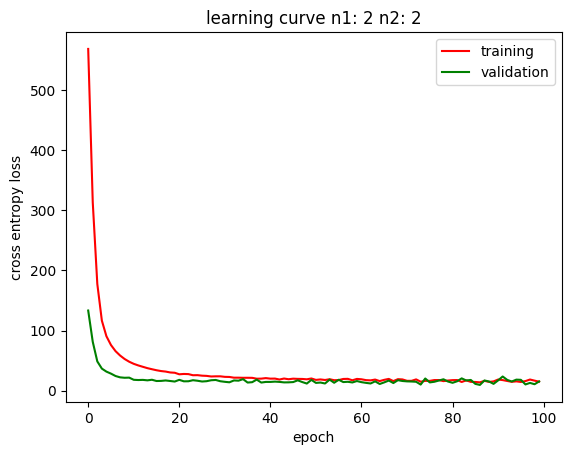



n1: 2  n2: 3  start w: 1
best validation cross-entropy: 10.033678554157472
corresponding training cross-entropy: 16.934875879993143
misclassification rate: 0.021818181818181848
best W1: [[0.99032514 1.3215968  1.39511521 1.3415484  0.04388316]
 [0.99032514 1.3215968  1.39511521 1.3415484  0.04388316]]
best W2: [[-0.00779104  1.26622671  1.26622671]
 [-0.00779104  1.26622671  1.26622671]
 [-0.00779104  1.26622671  1.26622671]]
best W3: [[ 4.92068158 -1.76038574 -1.76038574 -1.76038574]]


n1: 2  n2: 3  start w: 2
best validation cross-entropy: 10.033678554157472
corresponding training cross-entropy: 16.934875879993143
misclassification rate: 0.021818181818181848
best W1: [[0.99032514 1.3215968  1.39511521 1.3415484  0.04388316]
 [0.99032514 1.3215968  1.39511521 1.3415484  0.04388316]]
best W2: [[-0.00779104  1.26622671  1.26622671]
 [-0.00779104  1.26622671  1.26622671]
 [-0.00779104  1.26622671  1.26622671]]
best W3: [[ 4.92068158 -1.76038574 -1.76038574 -1.76038574]]


n1: 2  n2: 3

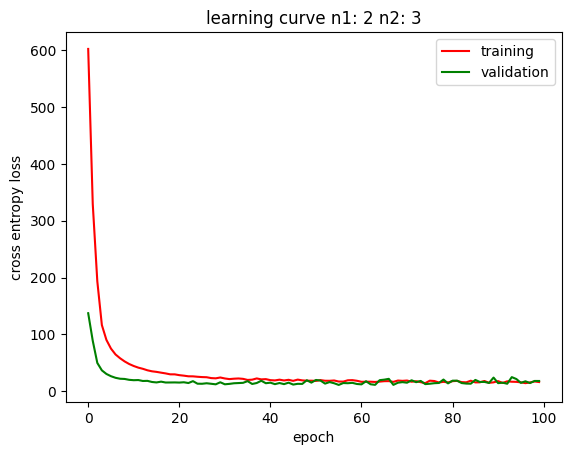



n1: 2  n2: 4  start w: 1
best validation cross-entropy: 9.726911810065637
corresponding training cross-entropy: 14.770726033653158
misclassification rate: 0.018181818181818188
best W1: [[0.96859939 1.31327102 1.40700926 1.3444186  0.0203853 ]
 [0.96859939 1.31327102 1.40700926 1.3444186  0.0203853 ]]
best W2: [[-0.01330813  1.10064049  1.10064049]
 [-0.01330813  1.10064049  1.10064049]
 [-0.01330813  1.10064049  1.10064049]
 [-0.01330813  1.10064049  1.10064049]]
best W3: [[ 4.92160199 -1.52415778 -1.52415778 -1.52415778 -1.52415778]]


n1: 2  n2: 4  start w: 2
best validation cross-entropy: 9.726911810065637
corresponding training cross-entropy: 14.770726033653158
misclassification rate: 0.018181818181818188
best W1: [[0.96859939 1.31327102 1.40700926 1.3444186  0.0203853 ]
 [0.96859939 1.31327102 1.40700926 1.3444186  0.0203853 ]]
best W2: [[-0.01330813  1.10064049  1.10064049]
 [-0.01330813  1.10064049  1.10064049]
 [-0.01330813  1.10064049  1.10064049]
 [-0.01330813  1.10064049  

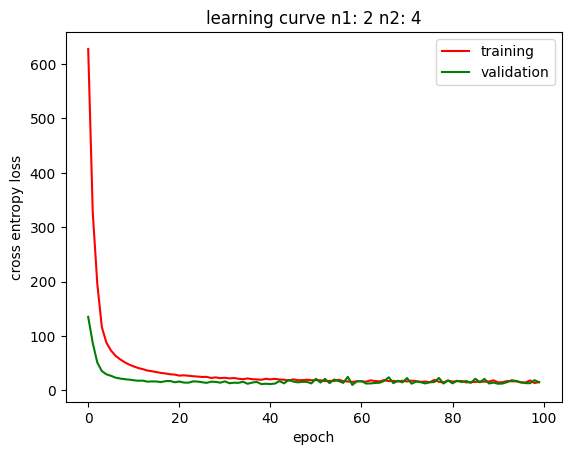



n1: 2  n2: 5  start w: 1
best validation cross-entropy: 10.427518476592635
corresponding training cross-entropy: 17.270833436880665
misclassification rate: 0.021818181818181848
best W1: [[0.95977206 1.33061251 1.3951067  1.32165452 0.03727608]
 [0.95977206 1.33061251 1.3951067  1.32165452 0.03727608]]
best W2: [[-0.01217073  0.98480189  0.98480189]
 [-0.01217073  0.98480189  0.98480189]
 [-0.01217073  0.98480189  0.98480189]
 [-0.01217073  0.98480189  0.98480189]
 [-0.01217073  0.98480189  0.98480189]]
best W3: [[ 4.9009592  -1.35813629 -1.35813629 -1.35813629 -1.35813629 -1.35813629]]


n1: 2  n2: 5  start w: 2
best validation cross-entropy: 10.427518476592635
corresponding training cross-entropy: 17.270833436880665
misclassification rate: 0.021818181818181848
best W1: [[0.95977206 1.33061251 1.3951067  1.32165452 0.03727608]
 [0.95977206 1.33061251 1.3951067  1.32165452 0.03727608]]
best W2: [[-0.01217073  0.98480189  0.98480189]
 [-0.01217073  0.98480189  0.98480189]
 [-0.01217073

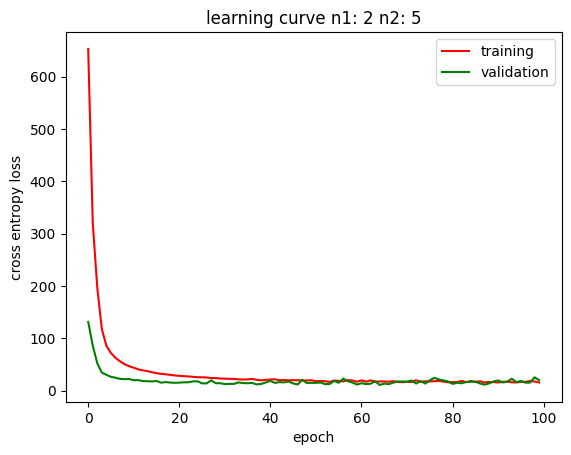



n1: 2  n2: 6  start w: 1
best validation cross-entropy: 11.156770011246264
corresponding training cross-entropy: 13.76757892493686
misclassification rate: 0.014545454545454528
best W1: [[-0.18550112 -1.38720566 -1.44852658 -1.40627259 -0.03397891]
 [-0.18550112 -1.38720566 -1.44852658 -1.40627259 -0.03397891]]
best W2: [[-0.13919024  0.88576778  0.88576778]
 [-0.13919024  0.88576778  0.88576778]
 [-0.13919024  0.88576778  0.88576778]
 [-0.13919024  0.88576778  0.88576778]
 [-0.13919024  0.88576778  0.88576778]
 [-0.13919024  0.88576778  0.88576778]]
best W3: [[-5.2432744   1.22314364  1.22314364  1.22314364  1.22314364  1.22314364
   1.22314364]]


n1: 2  n2: 6  start w: 2
best validation cross-entropy: 10.679123756477393
corresponding training cross-entropy: 18.02970597919189
misclassification rate: 0.018181818181818188
best W1: [[0.89190836 1.19936951 1.28381733 1.21076034 0.01319796]
 [0.89190836 1.19936951 1.28381733 1.21076034 0.01319796]]
best W2: [[-0.00938464  0.90049532  0.9

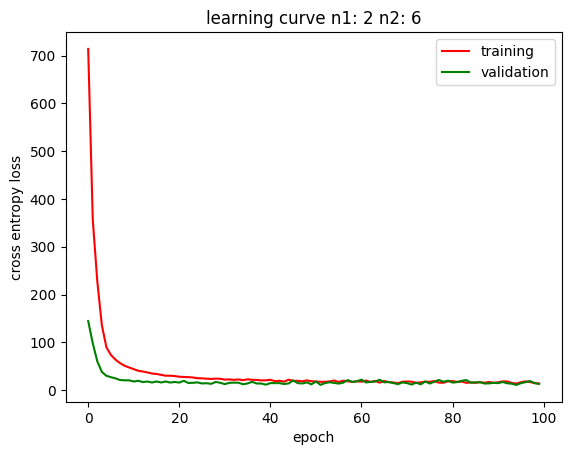



n1: 3  n2: 2  start w: 1
best validation cross-entropy: 10.793263432489582
corresponding training cross-entropy: 17.10537909161087
misclassification rate: 0.021818181818181848
best W1: [[0.79760683 1.06452515 1.14864618 1.08344682 0.01973868]
 [0.79760683 1.06452515 1.14864618 1.08344682 0.01973868]
 [0.79760683 1.06452515 1.14864618 1.08344682 0.01973868]]
best W2: [[-0.01150564  1.27135199  1.27135199  1.27135199]
 [-0.01150564  1.27135199  1.27135199  1.27135199]]
best W3: [[ 4.85738451 -2.16583005 -2.16583005]]


n1: 3  n2: 2  start w: 2
best validation cross-entropy: 10.793263432489582
corresponding training cross-entropy: 17.10537909161087
misclassification rate: 0.021818181818181848
best W1: [[0.79760683 1.06452515 1.14864618 1.08344682 0.01973868]
 [0.79760683 1.06452515 1.14864618 1.08344682 0.01973868]
 [0.79760683 1.06452515 1.14864618 1.08344682 0.01973868]]
best W2: [[-0.01150564  1.27135199  1.27135199  1.27135199]
 [-0.01150564  1.27135199  1.27135199  1.27135199]]
bes

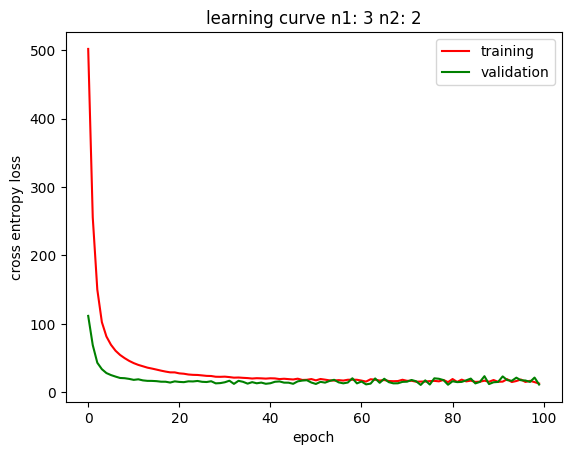



n1: 3  n2: 3  start w: 1
best validation cross-entropy: 10.50857462150448
corresponding training cross-entropy: 19.262937665323673
misclassification rate: 0.018181818181818188
best W1: [[0.70193401 0.9120916  0.9792613  0.93552479 0.01369609]
 [0.70193401 0.9120916  0.9792613  0.93552479 0.01369609]
 [0.70193401 0.9120916  0.9792613  0.93552479 0.01369609]]
best W2: [[-0.01584452  0.96093936  0.96093936  0.96093936]
 [-0.01584452  0.96093936  0.96093936  0.96093936]
 [-0.01584452  0.96093936  0.96093936  0.96093936]]
best W3: [[ 4.1010319  -1.62474548 -1.62474548 -1.62474548]]


n1: 3  n2: 3  start w: 2
best validation cross-entropy: 10.50857462150448
corresponding training cross-entropy: 19.262937665323673
misclassification rate: 0.018181818181818188
best W1: [[0.70193401 0.9120916  0.9792613  0.93552479 0.01369609]
 [0.70193401 0.9120916  0.9792613  0.93552479 0.01369609]
 [0.70193401 0.9120916  0.9792613  0.93552479 0.01369609]]
best W2: [[-0.01584452  0.96093936  0.96093936  0.96

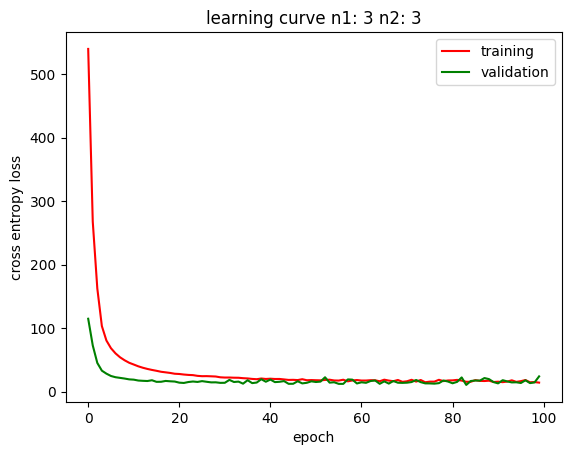



n1: 3  n2: 4  start w: 1
best validation cross-entropy: 10.95354403936694
corresponding training cross-entropy: 19.742159371589583
misclassification rate: 0.018181818181818188
best W1: [[0.69947285 0.90211406 0.97031907 0.92071241 0.01208785]
 [0.69947285 0.90211406 0.97031907 0.92071241 0.01208785]
 [0.69947285 0.90211406 0.97031907 0.92071241 0.01208785]]
best W2: [[-0.0099365   0.83284548  0.83284548  0.83284548]
 [-0.0099365   0.83284548  0.83284548  0.83284548]
 [-0.0099365   0.83284548  0.83284548  0.83284548]
 [-0.0099365   0.83284548  0.83284548  0.83284548]]
best W3: [[ 4.04912389 -1.39779267 -1.39779267 -1.39779267 -1.39779267]]


n1: 3  n2: 4  start w: 2
best validation cross-entropy: 9.860888009790061
corresponding training cross-entropy: 14.502602820977366
misclassification rate: 0.018181818181818188
best W1: [[0.81417072 1.11345691 1.16343796 1.127118   0.0186991 ]
 [0.81417072 1.11345691 1.16343796 1.127118   0.0186991 ]
 [0.81417072 1.11345691 1.16343796 1.127118   0.

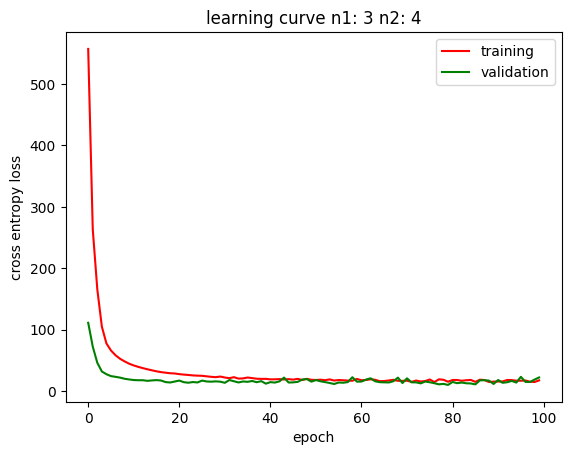



n1: 3  n2: 5  start w: 1
best validation cross-entropy: 10.595595250725536
corresponding training cross-entropy: 16.601350669783994
misclassification rate: 0.021818181818181848
best W1: [[0.78470845 1.02649029 1.08972824 1.04806947 0.03049202]
 [0.78470845 1.02649029 1.08972824 1.04806947 0.03049202]
 [0.78470845 1.02649029 1.08972824 1.04806947 0.03049202]]
best W2: [[-0.00622693  0.80283106  0.80283106  0.80283106]
 [-0.00622693  0.80283106  0.80283106  0.80283106]
 [-0.00622693  0.80283106  0.80283106  0.80283106]
 [-0.00622693  0.80283106  0.80283106  0.80283106]
 [-0.00622693  0.80283106  0.80283106  0.80283106]]
best W3: [[ 4.69522892 -1.34240434 -1.34240434 -1.34240434 -1.34240434 -1.34240434]]


n1: 3  n2: 5  start w: 2
best validation cross-entropy: 10.595595250725536
corresponding training cross-entropy: 16.601350669783994
misclassification rate: 0.021818181818181848
best W1: [[0.78470845 1.02649029 1.08972824 1.04806947 0.03049202]
 [0.78470845 1.02649029 1.08972824 1.0480

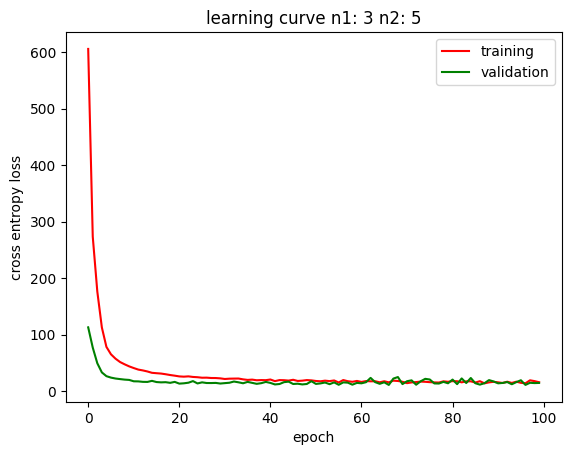



n1: 4  n2: 2  start w: 1
best validation cross-entropy: 10.456161965888773
corresponding training cross-entropy: 15.274443323833882
misclassification rate: 0.021818181818181848
best W1: [[0.71506218 0.95307602 1.00802957 0.96655681 0.02795831]
 [0.71506218 0.95307602 1.00802957 0.96655681 0.02795831]
 [0.71506218 0.95307602 1.00802957 0.96655681 0.02795831]
 [0.71506218 0.95307602 1.00802957 0.96655681 0.02795831]]
best W2: [[-0.0081622   1.10207018  1.10207018  1.10207018  1.10207018]
 [-0.0081622   1.10207018  1.10207018  1.10207018  1.10207018]]
best W3: [[ 4.9697373  -2.15763086 -2.15763086]]


n1: 4  n2: 2  start w: 2
best validation cross-entropy: 10.456161965888773
corresponding training cross-entropy: 15.274443323833882
misclassification rate: 0.021818181818181848
best W1: [[0.71506218 0.95307602 1.00802957 0.96655681 0.02795831]
 [0.71506218 0.95307602 1.00802957 0.96655681 0.02795831]
 [0.71506218 0.95307602 1.00802957 0.96655681 0.02795831]
 [0.71506218 0.95307602 1.008029

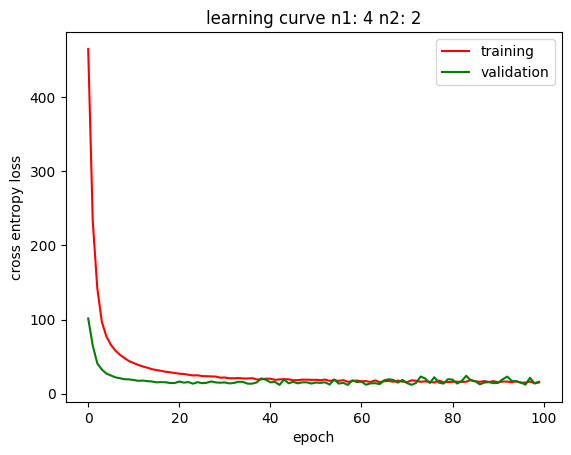



n1: 4  n2: 3  start w: 1
best validation cross-entropy: 9.868631995180577
corresponding training cross-entropy: 18.51749360050417
misclassification rate: 0.018181818181818188
best W1: [[0.64708697 0.87707522 0.92872543 0.88685809 0.02101369]
 [0.64708697 0.87707522 0.92872543 0.88685809 0.02101369]
 [0.64708697 0.87707522 0.92872543 0.88685809 0.02101369]
 [0.64708697 0.87707522 0.92872543 0.88685809 0.02101369]]
best W2: [[-0.01179482  0.87656771  0.87656771  0.87656771  0.87656771]
 [-0.01179482  0.87656771  0.87656771  0.87656771  0.87656771]
 [-0.01179482  0.87656771  0.87656771  0.87656771  0.87656771]]
best W3: [[ 4.57258249 -1.70181406 -1.70181406 -1.70181406]]


n1: 4  n2: 3  start w: 2
best validation cross-entropy: 9.664219037718397
corresponding training cross-entropy: 16.366229304231517
misclassification rate: 0.021818181818181848
best W1: [[0.73658885 0.99869085 1.05448173 1.01139364 0.03589928]
 [0.73658885 0.99869085 1.05448173 1.01139364 0.03589928]
 [0.73658885 0.998

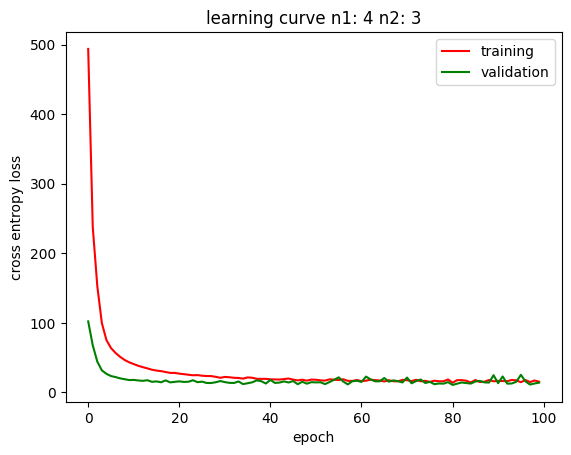



n1: 4  n2: 4  start w: 1
best validation cross-entropy: 11.213934690236652
corresponding training cross-entropy: 15.447873861684776
misclassification rate: 0.018181818181818188
best W1: [[0.68648037 0.888181   0.94236508 0.91083119 0.0219054 ]
 [0.68648037 0.888181   0.94236508 0.91083119 0.0219054 ]
 [0.68648037 0.888181   0.94236508 0.91083119 0.0219054 ]
 [0.68648037 0.888181   0.94236508 0.91083119 0.0219054 ]]
best W2: [[-0.00525682  0.77801347  0.77801347  0.77801347  0.77801347]
 [-0.00525682  0.77801347  0.77801347  0.77801347  0.77801347]
 [-0.00525682  0.77801347  0.77801347  0.77801347  0.77801347]
 [-0.00525682  0.77801347  0.77801347  0.77801347  0.77801347]]
best W3: [[ 4.67740416 -1.49902906 -1.49902906 -1.49902906 -1.49902906]]


n1: 4  n2: 4  start w: 2
best validation cross-entropy: 11.213934690236652
corresponding training cross-entropy: 15.447873861684776
misclassification rate: 0.018181818181818188
best W1: [[0.68648037 0.888181   0.94236508 0.91083119 0.0219054 

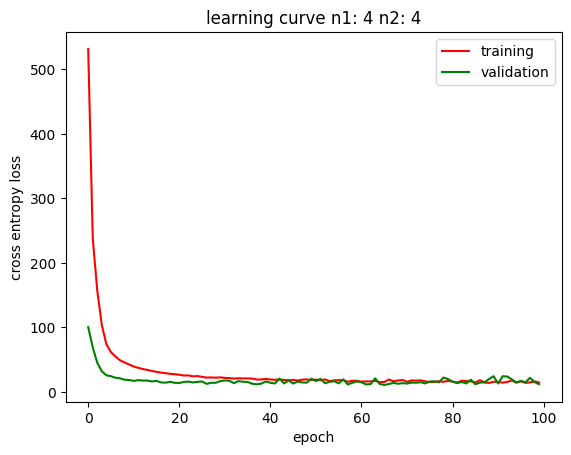



n1: 5  n2: 2  start w: 1
best validation cross-entropy: 11.031707922881562
corresponding training cross-entropy: 17.09626717335606
misclassification rate: 0.021818181818181848
best W1: [[0.59205737 0.78921333 0.83777344 0.79153188 0.01401588]
 [0.59205737 0.78921333 0.83777344 0.79153188 0.01401588]
 [0.59205737 0.78921333 0.83777344 0.79153188 0.01401588]
 [0.59205737 0.78921333 0.83777344 0.79153188 0.01401588]
 [0.59205737 0.78921333 0.83777344 0.79153188 0.01401588]]
best W2: [[-0.01315697  0.95899313  0.95899313  0.95899313  0.95899313  0.95899313]
 [-0.01315697  0.95899313  0.95899313  0.95899313  0.95899313  0.95899313]]
best W3: [[ 4.55844521 -2.09109696 -2.09109696]]


n1: 5  n2: 2  start w: 2
best validation cross-entropy: 11.031707922881562
corresponding training cross-entropy: 17.09626717335606
misclassification rate: 0.021818181818181848
best W1: [[0.59205737 0.78921333 0.83777344 0.79153188 0.01401588]
 [0.59205737 0.78921333 0.83777344 0.79153188 0.01401588]
 [0.592057

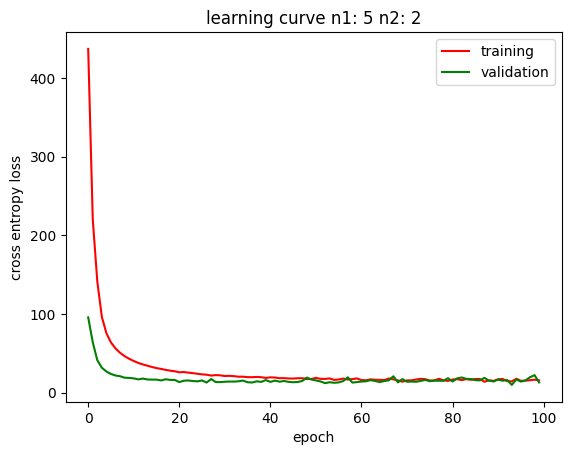



n1: 5  n2: 3  start w: 1
best validation cross-entropy: 11.063580104274276
corresponding training cross-entropy: 15.345047548209543
misclassification rate: 0.021818181818181848
best W1: [[0.61885379 0.83600323 0.88450546 0.83607812 0.01668727]
 [0.61885379 0.83600323 0.88450546 0.83607812 0.01668727]
 [0.61885379 0.83600323 0.88450546 0.83607812 0.01668727]
 [0.61885379 0.83600323 0.88450546 0.83607812 0.01668727]
 [0.61885379 0.83600323 0.88450546 0.83607812 0.01668727]]
best W2: [[-0.01190252  0.80518857  0.80518857  0.80518857  0.80518857  0.80518857]
 [-0.01190252  0.80518857  0.80518857  0.80518857  0.80518857  0.80518857]
 [-0.01190252  0.80518857  0.80518857  0.80518857  0.80518857  0.80518857]]
best W3: [[ 4.84857467 -1.73739444 -1.73739444 -1.73739444]]


n1: 5  n2: 3  start w: 2
best validation cross-entropy: 10.942359984591832
corresponding training cross-entropy: 14.992510309711959
misclassification rate: 0.021818181818181848
best W1: [[0.64680059 0.85302592 0.90159674 0.

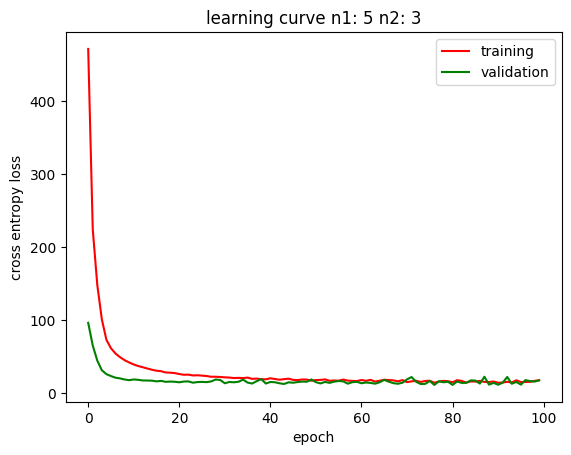



n1: 6  n2: 2  start w: 1
best validation cross-entropy: 10.6484856739949
corresponding training cross-entropy: 15.357050585602467
misclassification rate: 0.021818181818181848
best W1: [[0.57880565 0.77176662 0.81446753 0.78170555 0.01992643]
 [0.57880565 0.77176662 0.81446753 0.78170555 0.01992643]
 [0.57880565 0.77176662 0.81446753 0.78170555 0.01992643]
 [0.57880565 0.77176662 0.81446753 0.78170555 0.01992643]
 [0.57880565 0.77176662 0.81446753 0.78170555 0.01992643]
 [0.57880565 0.77176662 0.81446753 0.78170555 0.01992643]]
best W2: [[-0.0104664   0.90115606  0.90115606  0.90115606  0.90115606  0.90115606
   0.90115606]
 [-0.0104664   0.90115606  0.90115606  0.90115606  0.90115606  0.90115606
   0.90115606]]
best W3: [[ 4.88714336 -2.14375196 -2.14375196]]


n1: 6  n2: 2  start w: 2
best validation cross-entropy: 10.612420069302893
corresponding training cross-entropy: 14.59506187840952
misclassification rate: 0.021818181818181848
best W1: [[0.61044472 0.80718569 0.8529444  0.8214

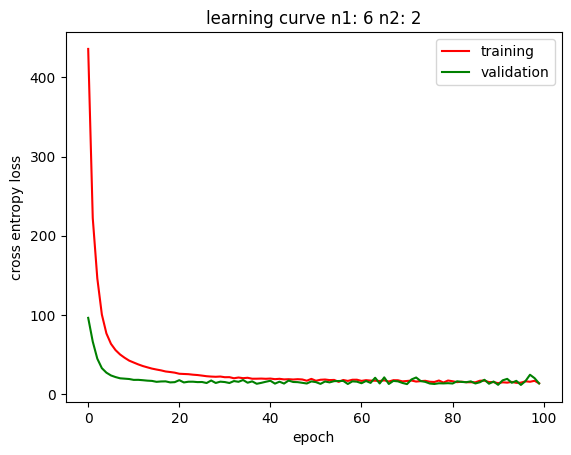



best n1: 2
best n2: 2
best overall cross-entropy: 9.494961771604974
W1 overall best: [[1.01900425 1.40163594 1.47403781 1.42454757 0.03164206]
 [1.01900425 1.40163594 1.47403781 1.42454757 0.03164206]]
W2 overall best: [[-0.01813813  1.56862248  1.56862248]
 [-0.01813813  1.56862248  1.56862248]]
W3 overall best: [[ 4.89595893 -2.04429762 -2.04429762]]
misclassification rate: 0.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

sc = StandardScaler()

dataset = pd.read_csv(
    "data_banknote_authentication.txt",
    header=None)
X_data = dataset.iloc[:, :-1].values
train = dataset.iloc[:, -1].values

rand_seed = 20

# split into train, test and validation set and standardize
X_train, X_test, t_train, t_test = train_test_split(X_data, train, test_size=0.2, random_state=rand_seed)
X_train, X_valid, t_train, t_valid = train_test_split(X_train, t_train, test_size=0.25, random_state=rand_seed)
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)


def main():
    max1 = 6
    max2 = 6
    best_n1 = 0
    best_n2 = 0
    best_n_ce = 100000  # initializa as a large number
    t_e_at_best = 0
    for n1 in range(2, max1+1):
        for n2 in range(2, max2+1):
            if n1 + n2 > 8:
                continue

            W1_best = np.zeros((n1, 5))
            W2_best = np.zeros((n2, n1 + 1))
            W3_best = np.zeros((1, n2 + 1))
            best_ce = 100000  # initializa as a large number
            for w in range(1, 4):  # 3 different starting weights
                print("n1: {0}  n2: {1}  start w: {2}".format(n1, n2, w))
                epoch = []
                err_valid = []
                err_train = []

                # initialize weights
                W1 = np.full((n1, 5), w / 5)  # 4 features so num of columns is 5
                W2 = np.full((n2, n1 + 1), w / 5)
                W3 = np.full((1, n2 + 1), w / 5)

                for i in range(100):  # epoch
                    epoch.append(i)

                    # shuffle rows each time
                    temp_arr = np.c_[X_train, t_train]
                    np.random.shuffle(temp_arr)
                    X = temp_arr[:, :-1]
                    t = temp_arr[:, -1]
                    y_pred = []
                    for j in range(len(X_train)):  # iterate through every sample
                        # update the weights each iteration
                        y, W1, W2, W3 = neural_net(X[j, :], t[j], W1, W2, W3)
                        y_pred.append(y)
                    y_pred = np.array(y_pred)
                    # training cross entropy
                    ce_loss_train = l_ce(t, y_pred)
                    err_train.append(ce_loss_train)

                    # validation cross entropy
                    y_valid = []
                    for j in range(len(X_valid)):  # iterate through every sample
                        # use trained weights each iteration
                        y, W1_temp, W2_temp, W3_temp = neural_net(X_valid[j, :], t_valid[j], W1, W2, W3)
                        y_valid.append(y)
                    y_valid = np.array(y_valid)
                    ce_loss_valid = l_ce(t_valid, y_valid)
                    err_valid.append(ce_loss_valid)
                    y_class = np.where(y_valid > 0.5, 1, 0)
                    misclass_rate = 1 - accuracy_score(t_valid, y_class)

                    #early stop
                    # if i > 10 and ce_loss_valid > err_valid[-5]:
                    #     break

                    # check if this is the smallest validation cross-entropy
                    if ce_loss_valid < best_ce:
                        t_e_at_best = ce_loss_train
                        best_ce = ce_loss_valid
                        best_misclass_rate = misclass_rate
                        W1_best = W1
                        W2_best = W2
                        W3_best = W3

                # calc validation, training error
                # print("err_train: {0}".format(err_train))
                # print("err_valid: {0}".format(err_valid))
                print("best validation cross-entropy: {0}".format(best_ce))
                print("corresponding training cross-entropy: {0}".format(t_e_at_best))
                print("misclassification rate: {0}".format(best_misclass_rate))
                print("best W1: {0}".format(W1_best))
                print("best W2: {0}".format(W2_best))
                print("best W3: {0}".format(W3_best))

                if w == 3:  # graph one of the weight assignments
                    # plot learning curve
                    plt.plot(epoch, err_train, color='red', label='training')
                    plt.plot(epoch, err_valid, color='green', label='validation')
                    plt.title('learning curve n1: {0} n2: {1}'.format(n1, n2))
                    plt.legend(loc='upper right')
                    plt.xlabel('epoch')
                    plt.ylabel('cross entropy loss')
                    plt.show()
                print("\n")
            # check if this is the smallest validation cross-entropy for all n1, n2 so far
            if best_ce < best_n_ce:
                best_n1 = n1
                best_n2 = n2
                best_n_ce = best_ce
                W1_n_best = W1_best
                W2_n_best = W2_best
                W3_n_best = W3_best
    print("best n1: {0}".format(best_n1))
    print("best n2: {0}".format(best_n2))
    print("best overall cross-entropy: {0}".format(best_n_ce))
    print("W1 overall best: {0}".format(W1_n_best))
    print("W2 overall best: {0}".format(W2_n_best))
    print("W3 overall best: {0}".format(W3_n_best))

    # for the chosen n1, n2
    # misclassification on test set
    y_test = []
    for j in range(len(X_test)):  # iterate through every sample
        # use trained weights each iteration
        y, W1_, W2_, W3_ = neural_net(X_test[j, :], t_test[j], W1_n_best, W2_n_best, W3_n_best)
        y_test.append(y)
    y_test = np.array(y_test)
    y_class = np.where(y_test > 0.5, 1, 0)
    misclass_rate = 1 - accuracy_score(t_test, y_class)
    print("misclassification rate: {0}".format(misclass_rate))


def l_ce(t, y_pred):
    y_pred[y_pred == 1] = 0.99999999999999999
    y_pred[y_pred == 0] = 0.00000000000000001
    return np.dot(-1 * t, np.log(y_pred)) - np.dot((1 - t), np.log(1 - y_pred))


def relu(h):
    h[h < 0] = 0
    return h


def d_relu(g):
    # relu derivative
    g[g >= 0] = 1
    g[g < 0] = 0
    return g


def new_w(w, w_J):
    alpha = 0.005
    w_new = w - np.dot(alpha, w_J)
    return w_new


def neural_net(x, t, W1, W2, W3):
    # fwd
    z1 = np.dot(W1, np.r_[1, x.T][:, None])
    # print("z1: {0}\n".format(z1))
    h1 = relu(z1.copy())
    # print("h1: {0}\n".format(h1))
    z2 = np.dot(W2, np.c_[1, h1.T].T)
    # print("z2: {0}\n".format(z2))
    h2 = relu(z2.copy())
    # print("h2: {0}\n".format(h2))
    z3 = np.dot(W3, np.c_[1, h2.T].T)
    # print("z3: {0}\n".format(z3))
    y = 1 / (1 + np.exp(-z3))
    # print("y: {0}\n".format(y))

    # bwd
    dj_dz3 = -t + y  # cross-entropy loss
    # print("dj_dz3: {0}\n".format(dj_dz3))
    w3_J = dj_dz3 * np.c_[1, h2.T]
    # print("w3_J: {0}\n".format(w3_J))
    z2_J = np.multiply(d_relu(z2), W3[:, 1:].T * dj_dz3)  # element wise multiplication
    # print("z2_J: {0}\n".format(z2_J))
    w2_J = np.dot(z2_J, np.c_[1, h1.T])
    # print("w2_J: {0}\n".format(w2_J))
    z1_J = np.multiply(d_relu(z1), np.dot(W2[:, 1:].T, z2_J))
    # print("z1_J: {0}\n".format(z1_J))
    w1_J = np.dot(z1_J, np.r_[1, x.T][None, :])
    # print("w1_J: {0}\n".format(w1_J))

    # new weights
    W1_new = new_w(W1, w1_J)
    W2_new = new_w(W2, w2_J)
    W3_new = new_w(W3, w3_J)

    return y.item(0), W1_new, W2_new, W3_new


if __name__ == '__main__':
    main()